# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

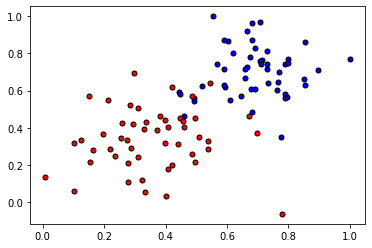

In [2]:
data = pd.read_csv('data.csv', header=None).rename(columns={0:'x0',1:'x1',2:'target'})
X = np.array(data[['x0','x1']])
y = np.array(data['target']).reshape(-1,1)
weights = np.random.rand(X.shape[1],1)
bias = 0
plot_points(X,y)
plt.show()

Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [3]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    return 1/(1+np.exp(-1*x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return np.dot(features, weights) + bias

# Error (log-loss) formula
def error_formula(y, output):
    a = np.zeros((len(y),1))
    for i in range(len(y)):
        a[i] = -y[i]*np.log(output[i])-(1-y[i])*np.log(1-output[i])
    return a

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias



In [4]:
X.shape

(100, 2)

In [5]:
weights.shape

(2, 1)

In [6]:
sigmoid(output_formula(X, weights, bias)).shape

(100, 1)

In [7]:
y.shape

(100, 1)

initial log-loss: 0.7155809366006083, initial accuracy: 0.49


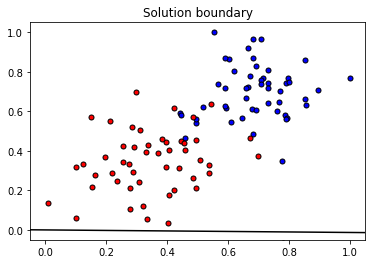

 log-loss: 0.6956484216691742, accuracy; 0.45


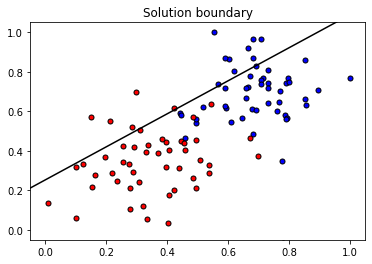

 log-loss: 0.6824854038215533, accuracy; 0.5


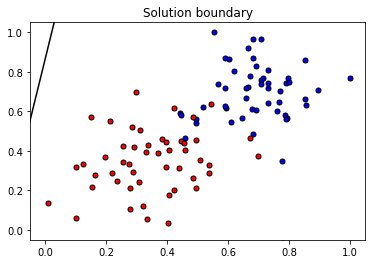

 log-loss: 0.671972079206758, accuracy; 0.5


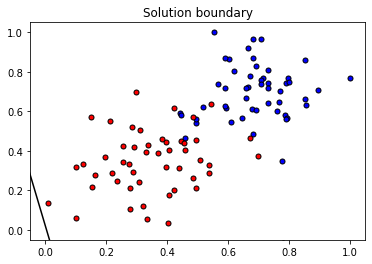

 log-loss: 0.662579937513937, accuracy; 0.52


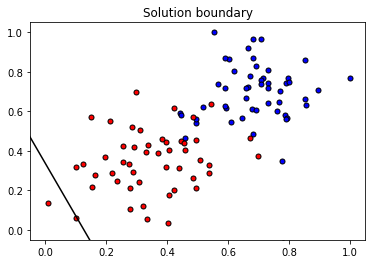

 log-loss: 0.6537435620501753, accuracy; 0.52


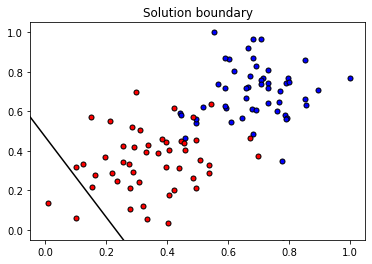

 log-loss: 0.6452507712915008, accuracy; 0.55


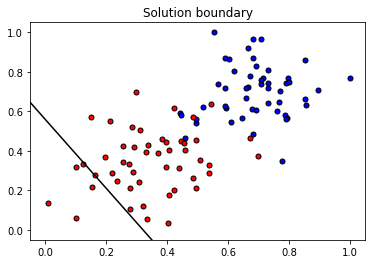

 log-loss: 0.6370192711687672, accuracy; 0.59


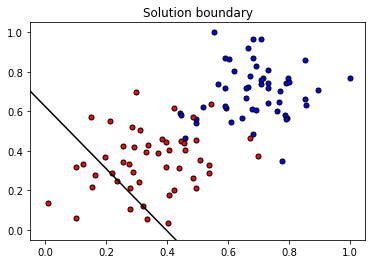

 log-loss: 0.6290148163308646, accuracy; 0.64


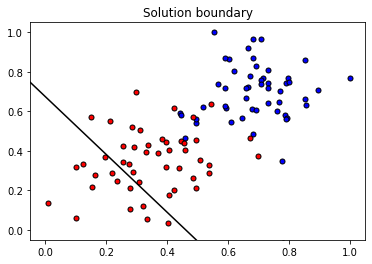

 log-loss: 0.6212210555289462, accuracy; 0.68


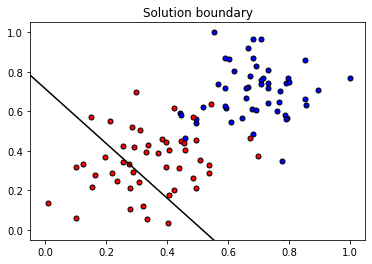

 log-loss: 0.613628362067618, accuracy; 0.69


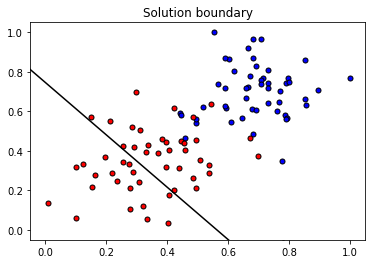

 log-loss: 0.6062296816977409, accuracy; 0.72


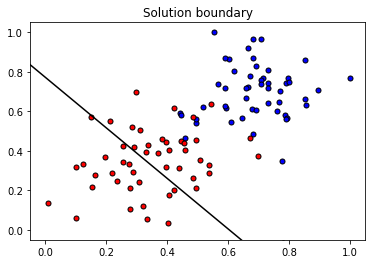

 log-loss: 0.5990189869490598, accuracy; 0.73


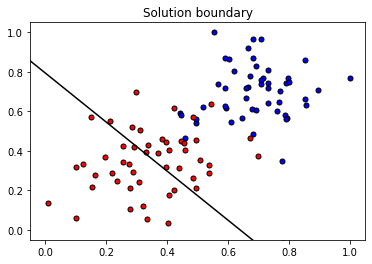

 log-loss: 0.5919907025866386, accuracy; 0.76


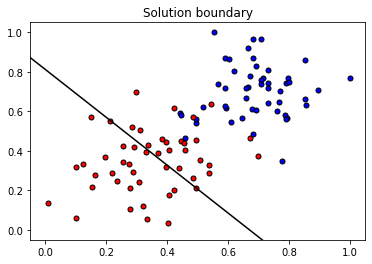

 log-loss: 0.5851394933624472, accuracy; 0.77


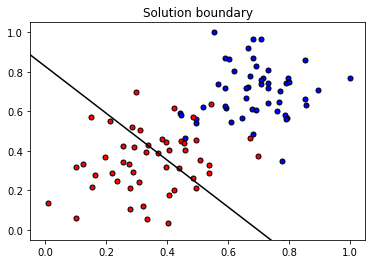

 log-loss: 0.5784601867700463, accuracy; 0.81


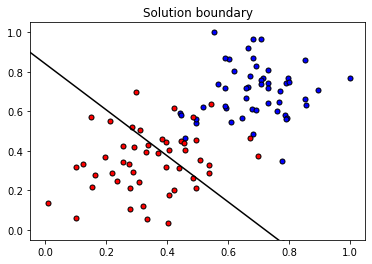

 log-loss: 0.5719477458269381, accuracy; 0.83


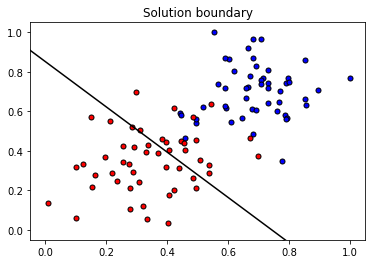

 log-loss: 0.5655972601183047, accuracy; 0.84


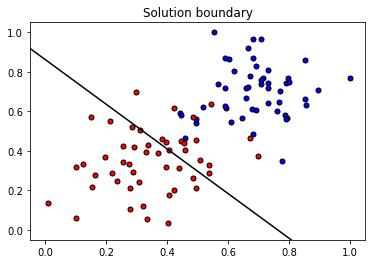

 log-loss: 0.5594039432556288, accuracy; 0.85


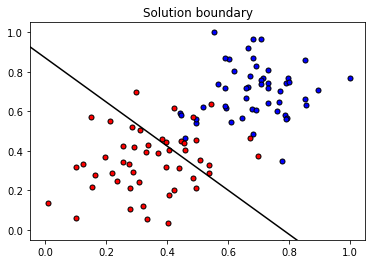

 log-loss: 0.5533631323629494, accuracy; 0.85


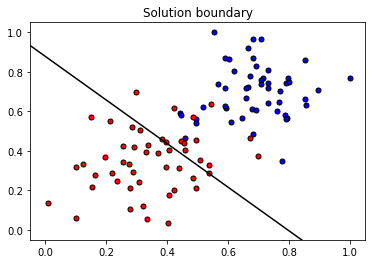

 log-loss: 0.5474702879935329, accuracy; 0.88


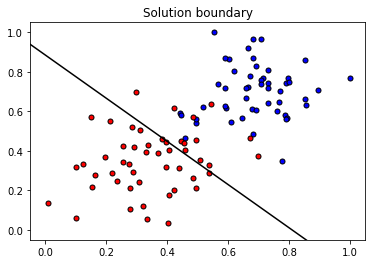

 log-loss: 0.5417209939197754, accuracy; 0.88


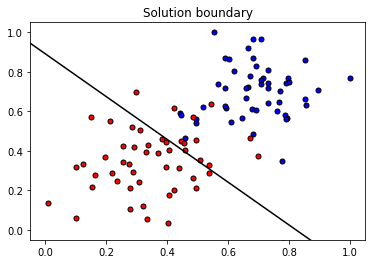

 log-loss: 0.5361109566238448, accuracy; 0.88


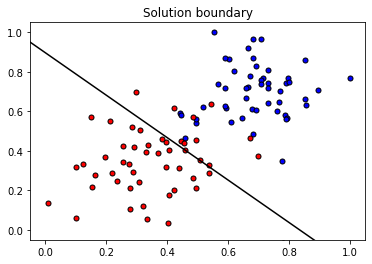

 log-loss: 0.5306360044564901, accuracy; 0.91


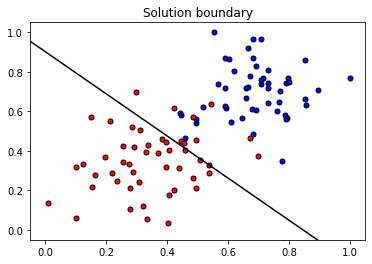

 log-loss: 0.5252920864803841, accuracy; 0.91


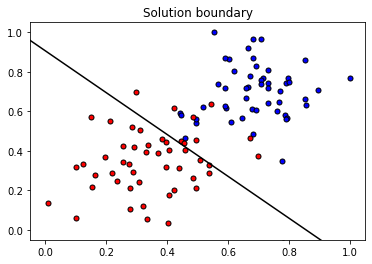

 log-loss: 0.5200752710298193, accuracy; 0.91


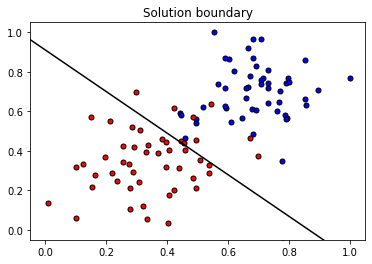

 log-loss: 0.5149817440218978, accuracy; 0.91


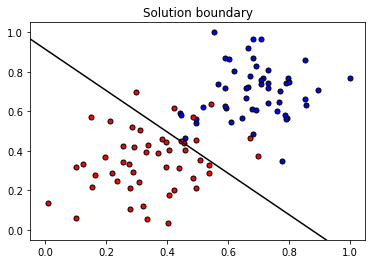

 log-loss: 0.5100078070534612, accuracy; 0.93


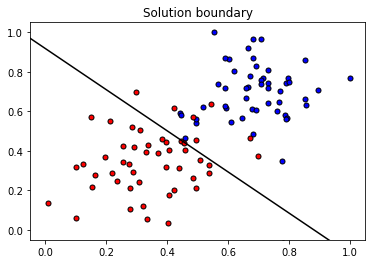

 log-loss: 0.505149875315727, accuracy; 0.93


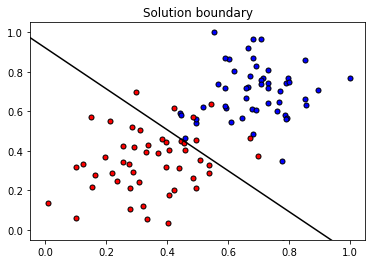

 log-loss: 0.5004044753559823, accuracy; 0.93


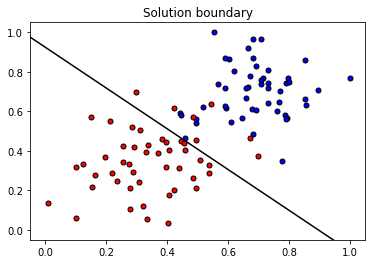

 log-loss: 0.4957682427130703, accuracy; 0.93


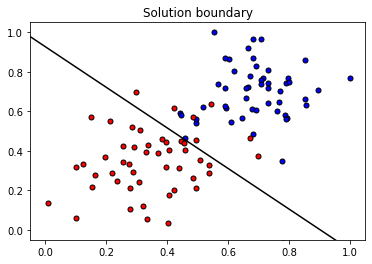

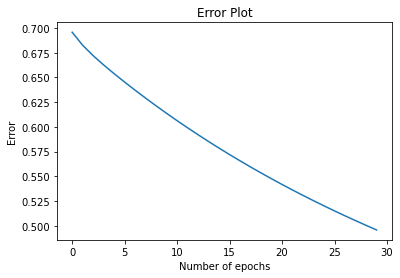

In [8]:
errors = []
print(f"initial log-loss: {error_formula(y, sigmoid(output_formula(X, weights, bias))).mean()}, initial accuracy: {np.mean((sigmoid(output_formula(X, weights, bias)) > 0.5) == y.astype('bool'))}")
# Plotting the solution boundary
plt.title("Solution boundary")
display(-weights[0]/weights[1], -bias/weights[1], 'black')

# Plotting the data
plot_points(X, y)
plt.show()
    
for e in range(0,30):   
    d_error = (y - sigmoid(output_formula(X, weights, bias)))
    for i in range(len(y)): 
        weights += 0.01 * d_error[i] * X[i].reshape(-1,1)
        bias += 0.01 * d_error[i]
    predictions = sigmoid(output_formula(X, weights, bias)) > 0.5
    accuracy = np.mean(predictions == y.astype('bool'))
    errors.append(error_formula(y, sigmoid(output_formula(X, weights, bias))).mean())
    print(f" log-loss: {error_formula(y, sigmoid(output_formula(X, weights, bias))).mean()}, accuracy; {accuracy}")
    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(X, y)
    plt.show()

# Plotting the error
plt.title("Error Plot")
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.plot(errors)
plt.show()
    